In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats





In [2]:
student_df = pd.DataFrame({'name': ['Alice', 'Bob', 'Carol', 'Dan', 'Eli', 'Fran'],
                           'gender': ['female', 'male','female', 'male', 'male', 'female'],
                           'class': ['FY', 'SO', 'SR', 'SO',' JR', 'SR'],
                           'gpa': [90, 93, 97, 89, 95, 92],'num_classes': [4, 3, 4, 4, 3, 2]})
student_df

,name,gender,class,gpa,num_classes
0,Alice,female,FY,90,4
1,Bob,male,SO,93,3
2,Carol,female,SR,97,4
3,Dan,male,SO,89,4
4,Eli,male,JR,95,3
5,Fran,female,SR,92,2


#### Create new attibute named 'female_flag' whose individual cells should hold the Boolean value True if the corresponding student is female, otherwise False

In [3]:
student_df['female_flag'] = student_df['gender'].apply(lambda x: x=='female')

In [4]:
student_df

,name,gender,class,gpa,num_classes,female_flag
0,Alice,female,FY,90,4,True
1,Bob,male,SO,93,3,False
2,Carol,female,SR,97,4,True
3,Dan,male,SO,89,4,False
4,Eli,male,JR,95,3,False
5,Fran,female,SR,92,2,True


In [5]:
student_df=student_df.drop('gender', axis=1)

In [6]:
student_df

,name,class,gpa,num_classes,female_flag
0,Alice,FY,90,4,True
1,Bob,SO,93,3,False
2,Carol,SR,97,4,True
3,Dan,SO,89,4,False
4,Eli,JR,95,3,False
5,Fran,SR,92,2,True


In [7]:
# apply hot encodding to class column by using get_dummies
student_df= pd.concat([student_df.drop('class', axis=1), pd.get_dummies(student_df['class'])], axis=1)
student_df

,name,gpa,num_classes,female_flag,JR,FY,SO,SR
0,Alice,90,4,True,0,1,0,0
1,Bob,93,3,False,0,0,1,0
2,Carol,97,4,True,0,0,0,1
3,Dan,89,4,False,0,0,1,0
4,Eli,95,3,False,1,0,0,0
5,Fran,92,2,True,0,0,0,1


In [8]:
gender_group = student_df.groupby('female_flag')
gender_group

In [9]:
gender_group['gpa'].mean()

female_flag
False    92.333333
True     93.000000
Name: gpa, dtype: float64

In [10]:
gender_group['num_classes'].sum()

female_flag
False    10
True     10
Name: num_classes, dtype: int64

## Scatterplot
scatter plots are used when we'd like to visualize the spatial distribution of the data that we are interested in. A potential goal of using a scatter plot is to reveal any clustering existing within our data, which can offer us further insights regarding the relationship between the attributes of our dataset

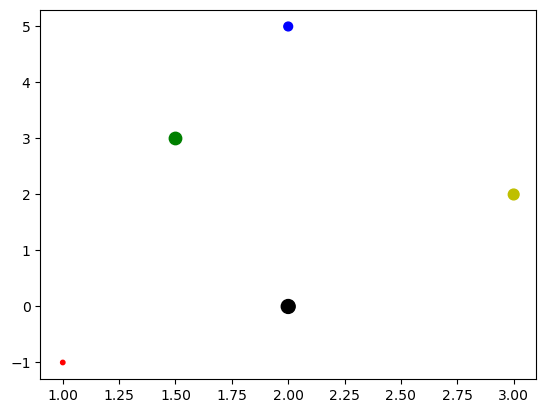

In [11]:
## Ploting a  list of points on plane
x = [1, 2, 3, 1.5, 2]
y = [-1, 5, 2, 3, 0]
sizes = [10, 40, 60, 80, 100]
colors = ['r', 'b', 'y', 'g', 'k']


plt.scatter(x, y, s=sizes, c=colors)
plt.show()

## Line Graphs 

Line graphs are used to visualize the trend of a specific function, which is represented by a list of points sequenced in order. As such, this method is highly applicable to data with some sequential elements, such as a time series dataset.

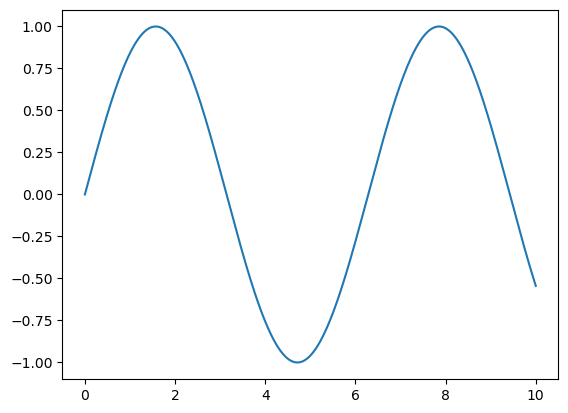

In [12]:
import numpy as np
x = np.linspace(0, 10, 1000)
y = np.sin(x)
plt.plot(x, y)
plt.show()

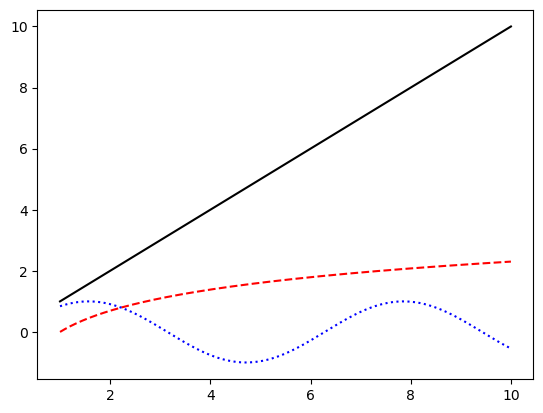

In [13]:
x = np.linspace(1, 10, 1000)
linear_line = x
log_curve = np.log(x)
sin_wave = np.sin(x)
curves = [linear_line, log_curve, sin_wave]
colors = ['k', 'r', 'b']
styles = ['-', '--', ':']
for curve, color, style in zip(curves, colors, styles):
    plt.plot(x, curve, c=color, linestyle=style)
plt.show()

## Bar Graphs
Bar graphs are typically used to represent the counts of unique values in a dataset via the height of individual bars.

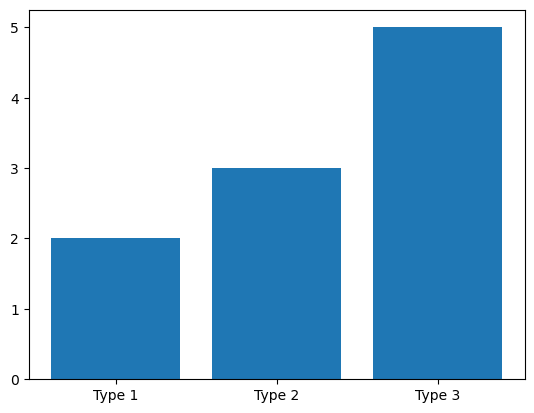

In [14]:
labels = ['Type 1', 'Type 2', 'Type 3']
counts = [2, 3, 5]
plt.bar(labels, counts)
plt.show()

## Histogram

A histogram is a visualization that places multiple bars together, but its connection to bar graphs ends there. Histograms are usually used to represent the distribution of values within an attribute (a numerical attribute, to be more precise). Taking in an array of numbers, a histogram should consist of multiple bars, each spanning across a specific range to denote the amount of numbers belonging to that range.

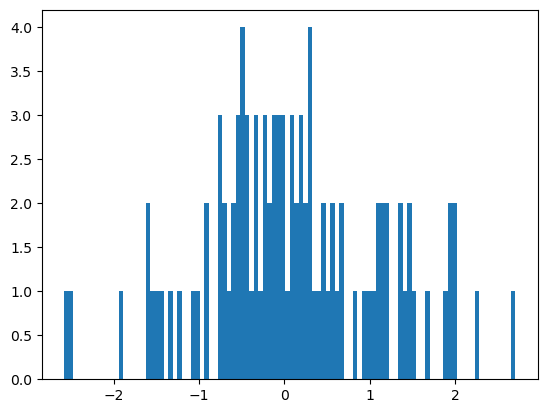

In [15]:
x = np.random.randn(100)
plt.hist(x, bins=100)
plt.show()

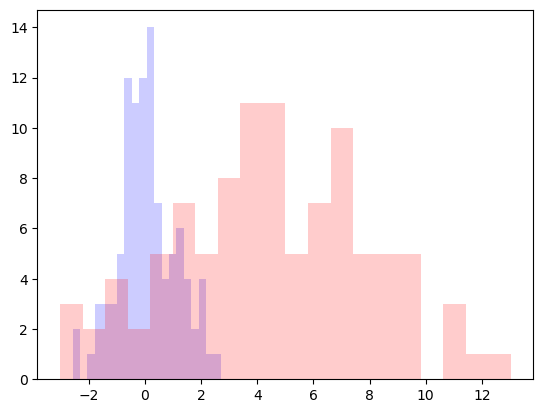

In [16]:
y = np.random.randn(100) * 4 + 5
plt.hist(x, color='b', bins=20, alpha=0.2)
plt.hist(y, color='r', bins=20, alpha=0.2)
plt.show()

Histograms are also quite useful in terms of helping us to compare the distributions of more than one attribute. For example, by adjusting the alpha argument (which specifies the opaqueness of a histogram), we can overlay multiple histograms in one graph so that their differences are highlighted. This is demonstrated by the following code and visualization

## Heatmaps 
A heatmap is generated with a 2D array of numbers, where numbers with high values correspond to hot colors, and low-valued numbers correspond to cold colors. With Matplotlib, a heatmap is created with the plt.imshow() function.

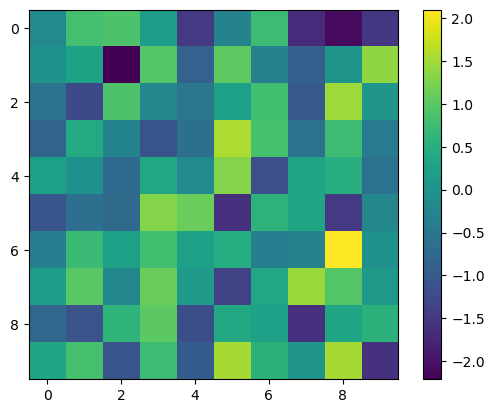

In [17]:
my_map = np.random.randn(10, 10)
plt.imshow(my_map)
plt.colorbar()
plt.show()

An important use of heatmaps is when we consider the correlation matrix of a dataset (which is a 2D array containing a correlation between any given pair of attributes within the dataset). A heatmap will be able to help us pinpoint any and all attributes that are highly correlated to one another.

In [18]:
samples = np.random.normal(0, 1, size=1000)

In [19]:
x = np.linspace(samples.min(), samples.max(), 1000)
y = stats.norm.pdf(x)

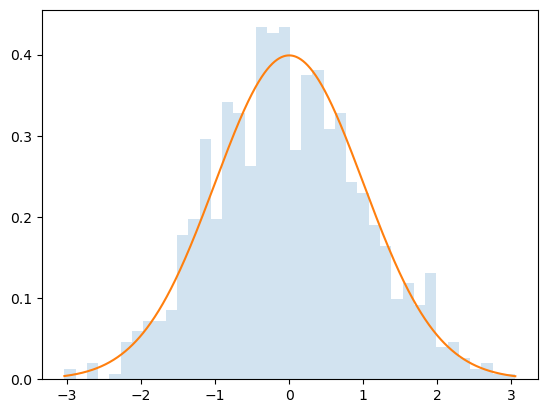

In [21]:
plt.hist(samples, alpha=0.2, bins=40, density=True)
plt.plot(x, y)
plt.show()

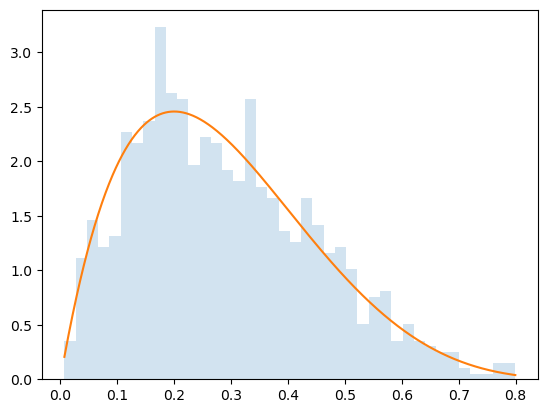

In [23]:
samples = np.random.beta(2, 5, size=1000)
x = np.linspace(samples.min(), samples.max(), 1000)
y = stats.beta.pdf(x, 2, 5)
plt.hist(samples, alpha=0.2, bins=40, density=True)
plt.plot(x, y)
plt.show()

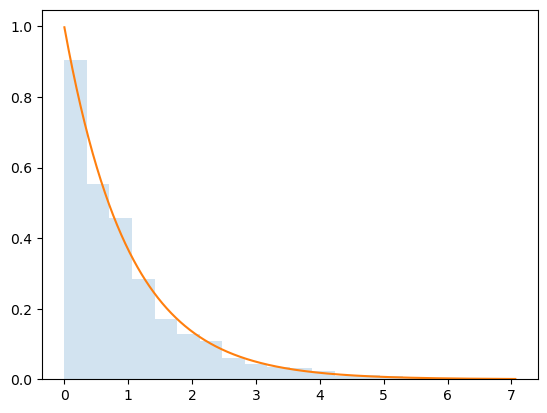

In [24]:
samples = np.random.gamma(1, size=1000)
x = np.linspace(samples.min(), samples.max(), 1000)
y = stats.gamma.pdf(x, 1)
plt.hist(samples, alpha=0.2, bins=20, density=True)
plt.plot(x, y)
plt.show()

## Seaborn 

In [25]:
x = np.random.normal(0, 1, 1000)
y = np.random.normal(5, 2, 1000)
df = pd.DataFrame({'Column 1': x, 'Column 2': y})
df.head()

,Column 1,Column 2
0,1.007377,7.431656
1,0.969565,5.625606
2,2.067489,3.392023
3,0.762827,8.434393
4,1.887750,5.032834


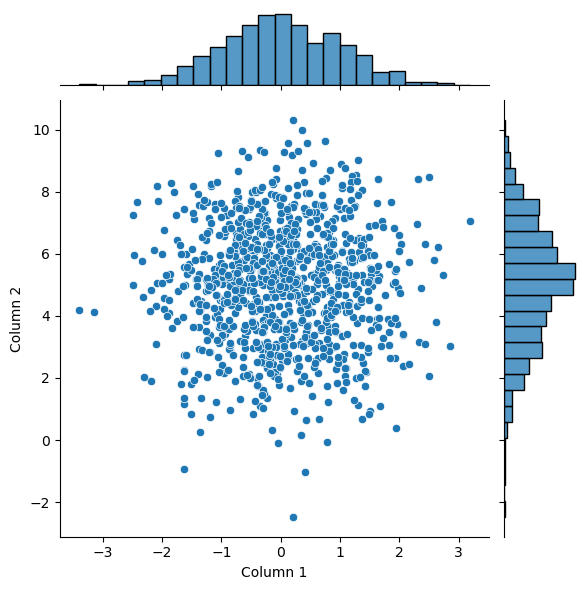

In [26]:
import seaborn as sns
sns.jointplot(x='Column 1', y='Column 2', data=df)
plt.show()

This visualization consists of a scatter plot for the two attributes and their respective histograms attached to the appropriate axes. From here, we can observe the distribution of individual attributes that we put in from the two histograms, as well as their joint distribution from the scatter plot.

In [30]:
student_df = pd.DataFrame({'name': ['Alice', 'Bob', 'Carol', 'Dan', 'Eli', 'Fran'],
                           'gender': ['female', 'male','female', 'male', 'male', 'female'],
                           'class': ['FY', 'SO', 'SR', 'SO',' JR', 'SR'],
                           'gpa': [90, 93, 97, 89, 95, 92],'num_classes': [4, 3, 4, 4, 3, 2]})
student_df

,name,gender,class,gpa,num_classes
0,Alice,female,FY,90,4
1,Bob,male,SO,93,3
2,Carol,female,SR,97,4
3,Dan,male,SO,89,4
4,Eli,male,JR,95,3
5,Fran,female,SR,92,2


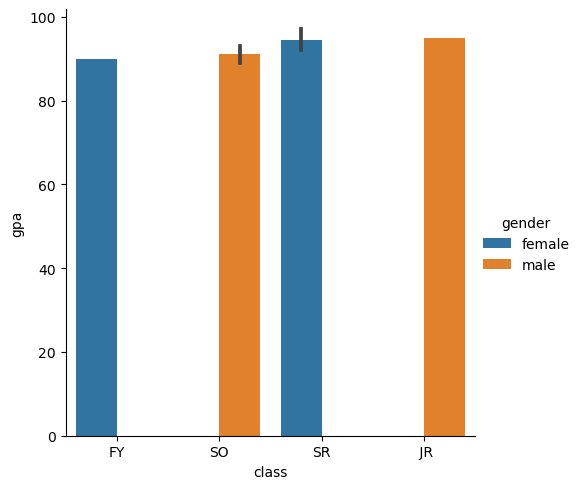

In [31]:
sns.catplot(x='class', y='gpa', hue='gender', kind='bar', data=student_df)
plt.show()

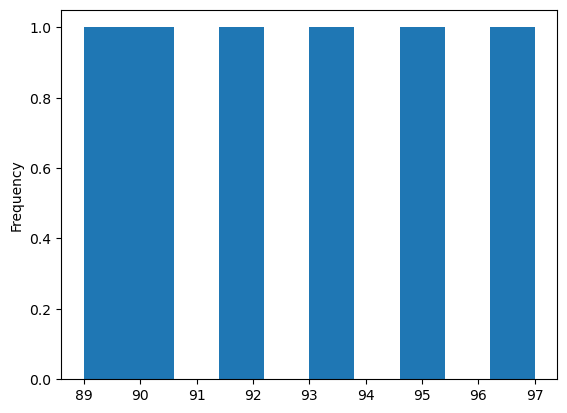

In [32]:
student_df['gpa'].plot.hist()
plt.show()

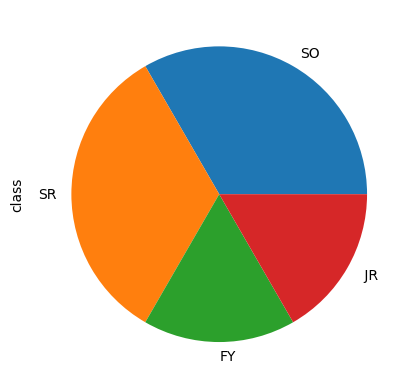

In [33]:
student_df['class'].value_counts().plot.pie()
plt.show()